In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [135]:
data = pd.read_csv('/content/Social_Net_class.csv')

In [136]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [138]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [139]:
data.drop(columns='User ID')

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [140]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [141]:
data['Gender'] = le.fit_transform(data['Gender'])
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [142]:
X = data.iloc[:,:-1].values
y = data.iloc[:,4].values

In [143]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.10)

In [144]:
X_train[:3]

array([[15733883,        1,       47,    25000],
       [15591433,        1,       36,    52000],
       [15725660,        1,       30,    87000]])

In [145]:
y_train[:3]

array([1, 0, 0])

In [146]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Gender,400.0,4.900000e-01,0.500526,0.0,0.00,0.0,1.0,1.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [147]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.neighbors import KNeighborsRegressor

In [148]:
# default value of neighbours: n_neighbors=5
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn.score(X_train,y_train)*100

82.5

In [149]:
knn.score(X_test,y_test)*100

72.5

In [150]:
y_pred = knn.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [151]:
display(y_test,y_pred)

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [152]:
#print('Accuracy is:',model.score(X_train,y_train))#98.33
print('Accuracy is:',knn.score(X_test,y_pred))# for predicted output accuracy is always 100

Accuracy is: 1.0


In [153]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))

[[26  7]
 [ 4  3]]


Text(50.58159722222221, 0.5, 'Actual')

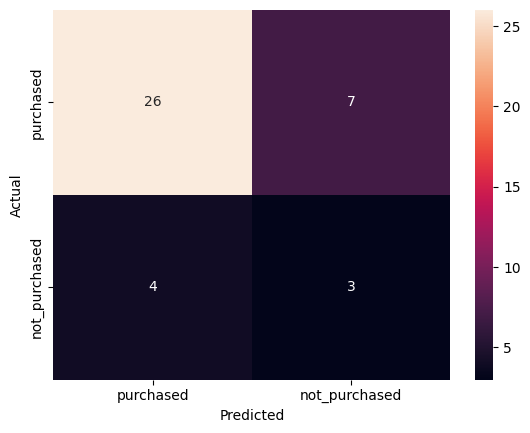

In [154]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,
           xticklabels=['purchased','not_purchased'],yticklabels=['purchased','not_purchased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [155]:
from sklearn.metrics import precision_score,recall_score,f1_score,r2_score

In [156]:
for i in range(1,11):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print('for k value:',i,'precision is:',precision_score(y_test,y_pred,average='weighted'))

for k value: 1 precision is: 0.7726666666666666
for k value: 2 precision is: 0.8229390681003583
for k value: 3 precision is: 0.7949404761904761
for k value: 4 precision is: 0.7875
for k value: 5 precision is: 0.7675000000000001
for k value: 6 precision is: 0.8
for k value: 7 precision is: 0.8
for k value: 8 precision is: 0.8154411764705882
for k value: 9 precision is: 0.8
for k value: 10 precision is: 0.8154411764705882


In [157]:
from sklearn.metrics import f1_score,confusion_matrix,roc_auc_score
f1_list=[]  # list for f1_score
k_list=[] # list for K value
for k in range(1,11):
    clf=KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    f=f1_score(y_test,pred,average='macro')
    f1_list.append(f)
    k_list.append(k)

In [158]:
#number of clusters
k_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [159]:
# f1_score for clusters 1-10
print(f1_list)

[0.561128526645768, 0.6875, 0.6203623813632442, 0.6307692307692307, 0.5891690009337068, 0.6536796536796536, 0.6536796536796536, 0.6785304247990815, 0.6536796536796536, 0.6785304247990815]


In [160]:
max(f1_list)

0.6875

In [163]:
f1_list.index(0.6875)

1

In [164]:
k_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [165]:
best_f1_score=max(f1_list)
best_k=k_list[f1_list.index(best_f1_score)]
print("Optimum K value=",best_k," with F1-Score=",best_f1_score)

Optimum K value= 2  with F1-Score= 0.6875


Text(0.5, 1.0, 'K neigbours vs f1_score')

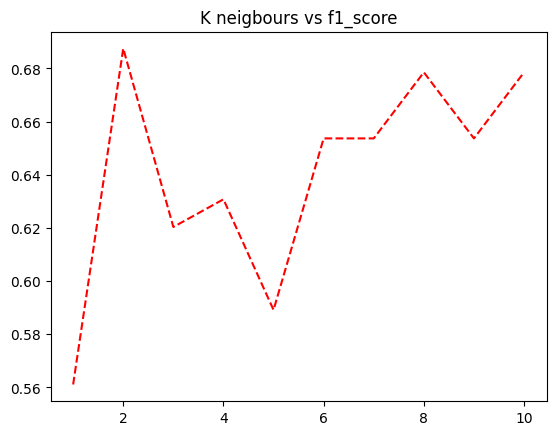

In [166]:
plt.plot(k_list,f1_list,'r--')
plt.title('K neigbours vs f1_score')

In [167]:
from sklearn.neighbors import KNeighborsClassifier
model_2 = KNeighborsClassifier(n_neighbors=20)
model_2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [168]:
model_2.score(X_train,y_train)*100

76.66666666666667

In [169]:
from sklearn.metrics import precision_score

In [170]:
p = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    p.append(precision_score(y_test,pred_i,average='macro'))

In [171]:
print(p)

[0.5733333333333334, 0.6738351254480286, 0.6130952380952381, 0.625, 0.5833333333333334, 0.6536796536796536, 0.6536796536796536, 0.6911764705882353, 0.6536796536796536, 0.6911764705882353, 0.6911764705882353, 0.6911764705882353, 0.6536796536796536, 0.6911764705882353, 0.6536796536796536, 0.6536796536796536, 0.6536796536796536, 0.6536796536796536, 0.6536796536796536, 0.6536796536796536]


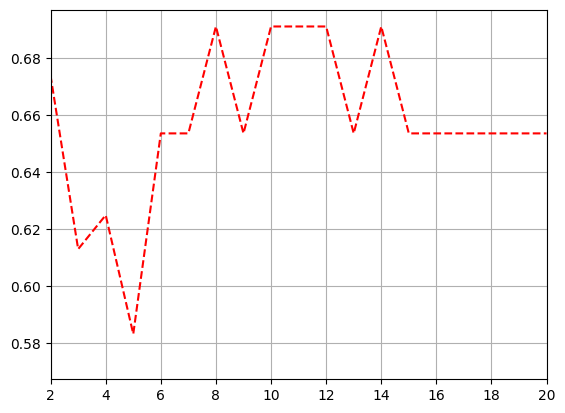

In [172]:
plt.plot(range(1,21),p,'--r')
plt.xlim((2,20))
plt.grid()

In [173]:
from sklearn.neighbors import KNeighborsClassifier

In [174]:
from sklearn.metrics import precision_score

In [175]:
pr_score = []
for i in range(1,16): #k value [1-15]
    model_1 = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    #training
    model_1.fit(X_train,y_train)
    ypred = model_1.predict(X_test)
    p_score = precision_score(y_test,ypred,average='macro')
    print('Precision for k:',i,'is:',round(p_score*100,2))
    pr_score.append(p_score)

Precision for k: 1 is: 57.33
Precision for k: 2 is: 67.38
Precision for k: 3 is: 61.31
Precision for k: 4 is: 62.5
Precision for k: 5 is: 58.33
Precision for k: 6 is: 65.37
Precision for k: 7 is: 65.37
Precision for k: 8 is: 69.12
Precision for k: 9 is: 65.37
Precision for k: 10 is: 69.12
Precision for k: 11 is: 69.12
Precision for k: 12 is: 69.12
Precision for k: 13 is: 65.37
Precision for k: 14 is: 69.12
Precision for k: 15 is: 65.37


In [176]:
print(pr_score)

[0.5733333333333334, 0.6738351254480286, 0.6130952380952381, 0.625, 0.5833333333333334, 0.6536796536796536, 0.6536796536796536, 0.6911764705882353, 0.6536796536796536, 0.6911764705882353, 0.6911764705882353, 0.6911764705882353, 0.6536796536796536, 0.6911764705882353, 0.6536796536796536]


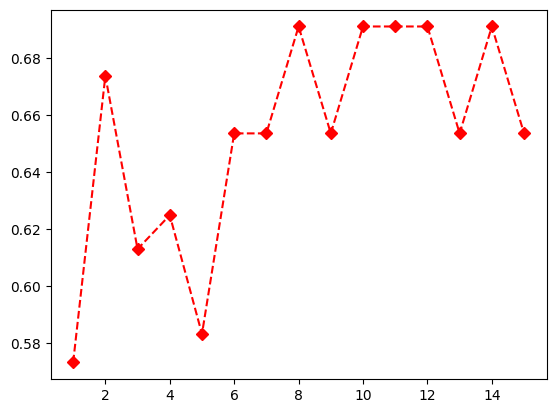

In [177]:
plt.plot(range(1,16),pr_score,'--Dr')